### Introduction
In this file I use the data prepared in the EDA1 and EDA2 notebooks for perform ML classification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
def showResults(prediction,y_test):
    """
    prints accurasy score, confusion matrix and classification report
    """
    print("Accuraccy score: {:.2f}% ".format(100 * accuracy_score(prediction, y_test)))
    print("\n Confusion matrix: \n",confusion_matrix(prediction, y_test))
    print("\n classification report: \n",classification_report(prediction, y_test))

In [4]:
df = pd.read_pickle("EDA2.pkl")

# Machine Learning - Classification Algorithms

I perform training using different ML methods:
1. K nearest neighbours
2. Naive Bayes
3. Support Vector Machine 
4. Logistic Regression
5. Decision Tree
6. Random Forest


For each algorithm some optimisation is done.

Then the comparison of accuracy is done.

This is the first version of the module more advanced analysis will be gradually added.




In [5]:
df.sample(5)

,age,balance,duration,campaign,pdays,previous,job_is__admin.,job_is__blue-collar,job_is__entrepreneur,job_is__housemaid,...,loan_is__no,loan_is__yes,contact_is__cellular,contact_is__telephone,contact_is__unknown,poutcome_is__failure,poutcome_is__other,poutcome_is__success,poutcome_is__unknown,y
14643,-0.627668,-0.683922,0.483005,-0.007492,-0.416056,-0.375262,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
12224,-0.426419,1.237179,-0.292573,-0.007492,-0.416056,-0.375262,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
29504,-0.225171,0.263371,0.330789,-0.882404,-0.416056,-0.375262,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
22057,0.982319,0.160929,0.475756,0.867420,-0.416056,-0.375262,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
8590,-0.426419,2.084440,0.149579,-0.007492,-0.416056,-0.375262,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


### Data splitting

Creating training and testing sets.


In [6]:
X = df.iloc[:,:-1]
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




In [7]:
comparison = pd.DataFrame(columns = ["Name", "Accuracy"])

## K Nearest Neighbours classification

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train);

In [9]:
prediction = classifier.predict(X_test)
showResults(prediction,y_test)

Accuraccy score: 92.16% 

 Confusion matrix: 
 [[9907  754]
 [ 104  180]]

 classification report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     10661
           1       0.19      0.63      0.30       284

    accuracy                           0.92     10945
   macro avg       0.59      0.78      0.63     10945
weighted avg       0.97      0.92      0.94     10945



In [11]:
a,b = classifier.score(X_train,y_train), classifier.score(X_test,y_test)
print(f"Accuracy for train set: {100*a:.2f}%, for test set: {100*b:.2f}%, difference: {100*(a-b):.2f}")

Accuracy for train set: 93.28%, for test set: 92.16%, difference: 1.12


### Optimisation - the elbow method

In [12]:
data = []
for i in range(1,41):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    error = 1 - accuracy_score(classifier.predict(X_test), y_test)
    data.append([i,error])


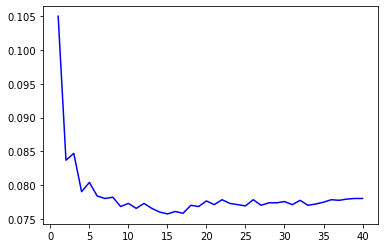

In [13]:
x = [a[0] for a in data]
y = [a[1] for a in data]
plt.plot(x,y,color='blue')

In [14]:
# we chose cut off on the level 10
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
showResults(prediction,y_test)


Accuraccy score: 92.27% 

 Confusion matrix: 
 [[9928  763]
 [  83  171]]

 classification report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     10691
           1       0.18      0.67      0.29       254

    accuracy                           0.92     10945
   macro avg       0.59      0.80      0.62     10945
weighted avg       0.97      0.92      0.94     10945



In [15]:
comparison = comparison.append({"Name" : "KNN", "Accuracy" : accuracy_score(prediction, y_test)},
                               ignore_index = True)

## Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train);

In [17]:
prediction = classifier.predict(X_test)
showResults(prediction,y_test)

Accuraccy score: 82.45% 

 Confusion matrix: 
 [[8472  382]
 [1539  552]]

 classification report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      8854
           1       0.59      0.26      0.36      2091

    accuracy                           0.82     10945
   macro avg       0.72      0.61      0.63     10945
weighted avg       0.80      0.82      0.80     10945



In [18]:
comparison = comparison.append({"Name" : "Naive B", "Accuracy" : accuracy_score(prediction, y_test)},
                               ignore_index = True)

### SVM


In [19]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
prediction = classifier.predict(X_test)
showResults(prediction,y_test)

Accuraccy score: 92.51% 

 Confusion matrix: 
 [[9888  697]
 [ 123  237]]

 classification report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     10585
           1       0.25      0.66      0.37       360

    accuracy                           0.93     10945
   macro avg       0.62      0.80      0.66     10945
weighted avg       0.96      0.93      0.94     10945



In [21]:
comparison = comparison.append({"Name" : "SVM", "Accuracy" : accuracy_score(prediction, y_test)}, 
                               ignore_index = True)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [24]:
accuracy = lr.score(X_test,y_test)

In [25]:
comparison = comparison.append({"Name" : "Log Reg", "Accuracy" : accuracy}, ignore_index = True)

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
accuracy = dt.score(X_test,y_test)

In [29]:
comparison = comparison.append({"Name" : "Dec Tree", "Accuracy" : accuracy}, ignore_index = True)

## Random Forrest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
accuracy = rf.score(X_test,y_test)

In [33]:
prediction = rf.predict(X_test)
showResults(prediction,y_test)

Accuraccy score: 92.75% 

 Confusion matrix: 
 [[9878  661]
 [ 133  273]]

 classification report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     10539
           1       0.29      0.67      0.41       406

    accuracy                           0.93     10945
   macro avg       0.64      0.80      0.68     10945
weighted avg       0.96      0.93      0.94     10945



In [34]:
comparison = comparison.append({"Name" : "Rand Forr", "Accuracy" : accuracy}, ignore_index = True)

## Comparison

In [35]:
comparison.sort_values(by=["Accuracy"], ascending= False)

,Name,Accuracy
4,Dec Tree,0.927455
5,Rand Forr,0.927455
3,Log Reg,0.926542
2,SVM,0.925080
0,KNN,0.922704
1,Naive B,0.824486
